In [96]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Equalization
import matplotlib.pyplot as plt

In [97]:
dataset = tf.keras.utils.image_dataset_from_directory(r"/home/sandeepgautam/EyeDiseaseDetection/eye disease dataset",
                                                      batch_size = 100,
                                                      image_size = (120,120),
                                                      seed=123)

Found 4209 files belonging to 4 classes.


In [98]:
class_names = dataset.class_names
print(class_names)

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']


In [99]:
dataset = dataset.shuffle(buffer_size=len(dataset))

In [100]:
train_size = int(len(dataset)*0.7)
val_size = int(len(dataset)*0.2)
test_size = int(len(dataset)*0.1)
print(train_size)
print(val_size)
print(test_size)

30
8
4


In [101]:
train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size+val_size).take(test_size)

In [102]:
equilizer = Equalization(value_range=(0,1))
def preprocess(x,y):
    x = x/255.0
    x = equilizer(x)
    return x, y

In [103]:
train = train.map(preprocess)
val = val.map(preprocess)
test = test.map(preprocess)

In [104]:
batch = val.as_numpy_iterator().next()

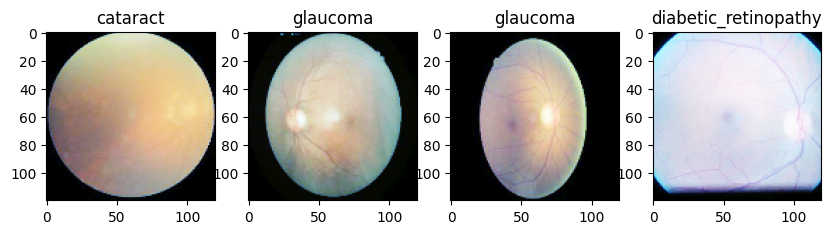

In [105]:
batch = train.as_numpy_iterator().next()
fig,ax = plt.subplots(ncols = 4,figsize=(10,10))
for indx,img in enumerate(batch[0][:4]):
  ax[indx].imshow(img)
  ax[indx].title.set_text(class_names[batch[1][indx]])

In [106]:
train = train.shuffle(len(train))

In [107]:
model = Sequential([
      Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(120,120, 3)),
      MaxPooling2D(2,2),
      Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
      MaxPooling2D(2,2),
      Conv2D(filters=128, kernel_size=(2, 2), activation='relu'),
      MaxPooling2D(2,2),
      Flatten(),
      Dense(128, activation='relu'),
      Dropout(0.25),
      Dense(64, activation='relu'),
      Dropout(0.25),
      Dense(4, activation='softmax')
])

In [108]:
model.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        tf.keras.metrics.SparseCategoricalAccuracy(name = 'Accuracy'),
        tf.keras.metrics.SparseTopKCategoricalAccuracy(10,name="top-10-Accuracy"),
    ],
)

In [109]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 119, 119, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 58, 58, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,261,476 (12.44 MB)

 Trainable params: 3,261,476 (12.44 MB)

 Non-trainable params: 0 (0.00 B)

In [110]:
history = model.fit(train,epochs=50 ,validation_data=val)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 436ms/step - Accuracy: 0.3976 - loss: 1.2797 - top-10-Accuracy: 1.0000 - val_Accuracy: 0.5713 - val_loss: 0.9666 - val_top-10-Accuracy: 1.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 452ms/step - Accuracy: 0.5599 - loss: 0.9408 - top-10-Accuracy: 1.0000 - val_Accuracy: 0.6837 - val_loss: 0.7743 - val_top-10-Accuracy: 1.0000
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 454ms/step - Accuracy: 0.6232 - loss: 0.8092 - top-10-Accuracy: 1.0000 - val_Accuracy: 0.6625 - val_loss: 0.8347 - val_top-10-Accuracy: 1.0000
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 463ms/step - Accuracy: 0.6721 - loss: 0.7300 - top-10-Accuracy: 1.0000 - val_Accuracy: 0.7563 - val_loss: 0.6122 - val_top-10-Accuracy: 1.0000
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 479ms/step - Accuracy: 0.7122 - loss: 0.6573 - top-10-Accuracy: 1.0000 - val_Accuracy: 0.7675 - val_loss: 0.5372 - val_top-10-Accuracy: 1.0000
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 481ms/step - Accuracy: 0.7373 - l

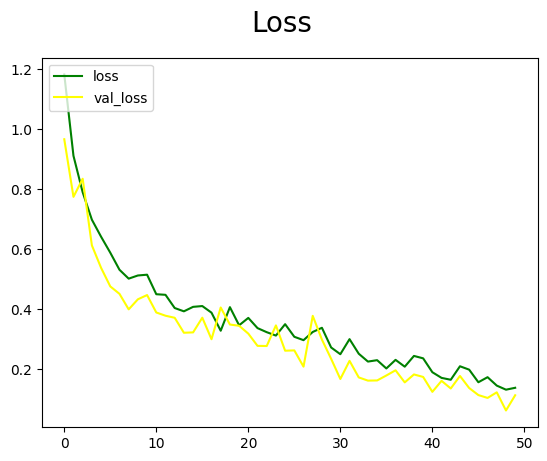

In [111]:
fig = plt.figure()
plt.plot(history.history['loss'],color='green',label='loss')
plt.plot(history.history['val_loss'],color='yellow',label='val_loss')
plt.legend(loc='upper left')
fig.suptitle('Loss',fontsize=20)
plt.show()

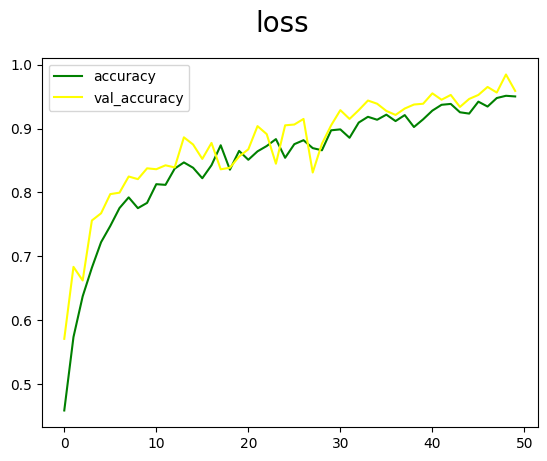

In [112]:
fig = plt.figure()
plt.plot(history.history['Accuracy'],color='green',label='accuracy')
plt.plot(history.history['val_Accuracy'],color='yellow',label='val_accuracy')
plt.legend(loc='upper left')
fig.suptitle('loss',fontsize=20)
plt.show()

In [113]:
print('Training results')
model.evaluate(train)

print('Validation results')
model.evaluate(val)

print('Test results')
model.evaluate(test)

Training results
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - Accuracy: 0.9607 - loss: 0.1005 - top-10-Accuracy: 1.0000
Validation results
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - Accuracy: 0.9658 - loss: 0.1070 - top-10-Accuracy: 1.0000
Test results
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 209ms/step - Accuracy: 0.9409 - loss: 0.1253 - top-10-Accuracy: 1.0000


[0.106484055519104, 0.954692542552948, 1.0]

In [114]:
from tensorflow.keras.metrics import Precision, Recall
import numpy as np

pre = Precision()
re = Recall()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    yhat = np.argmax(yhat, axis=1)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


2025-05-02 08:48:08.614583: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [115]:
print("Precision: ",pre.result().numpy(),"Recall: ",re.result().numpy())

Precision:  0.9866667 Recall:  0.996633


In [118]:
model.save("EyeDiseaseDetection.keras")